# TP 2 - Procesamiento de Imagenes - viasampling.m
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

In [12]:
import sys
sys.path.append("D:/VSCodeRepos/Digital-Image-Processing/")
from common.functions import *

In [13]:
from functions import *

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***

Carga de la imagen original

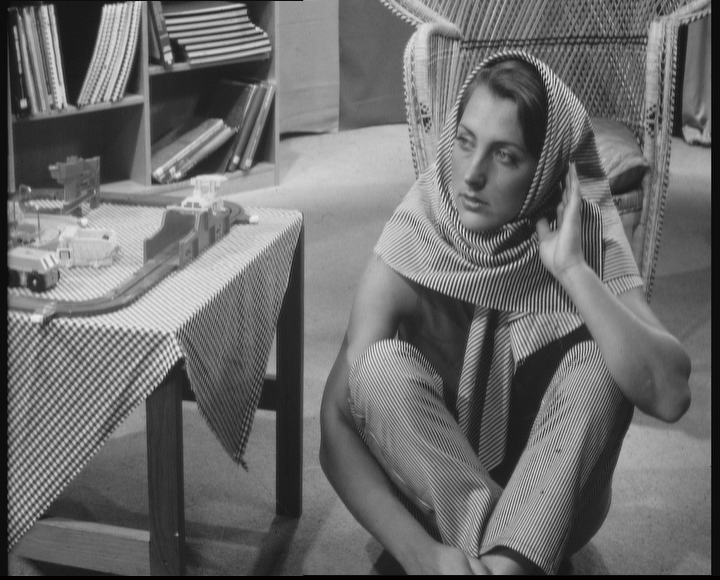

In [15]:
barb = Image.open('img/barbara.gif')
w, h = barb.size
displayImage(barb, w, h)

Recorte a cuadrado de 500x500

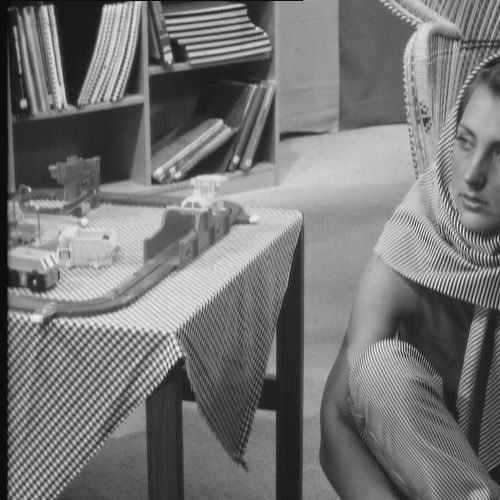

In [16]:
w_sq, h_sq = (500, 500)
barb_square = barb.crop((0,0,w_sq,h_sq))
displayImage(barb_square, w_sq, h_sq)

Down/Up sampling factor

In [17]:
m = 2

***
### Filtrado

Tanto en el downsampling como upsampling se hace uso de una función de filtrado ideal. Si bien cumple distintos propósitos en cada una, sirve entender su funcionamiento antes de explicar lo siguiente.

El filtro es escencialmente un 'brick wall low-pass' en el dominio de la frecuencia; es decir, dada una frecuencia de corte w en forma de una distancia desde el centro (0,0), todo elemento del espectro fuera del radio se reemplaza por un 0. La distancia se toma basada en la ecuación de una circunferencia $r^2 = x^2 + y^2$.

***
### Downsampling

El proceso de downsampling en sí consiste simplemente en una decimación, tomando una muestra cada $m$.

Aplicando downsampling sin filtro

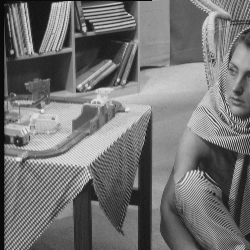

In [18]:
barb_ds_nf = downsampling(barb_square, m, 'FILTER_OFF')
w_ds_nf, h_ds_nf = barb_ds_nf.size
displayImage(barb_ds_nf, w_ds_nf, h_ds_nf)

La pérdida de muestras genera un efecto de alias, notable en la información de alta frecuencia, como las rayas en la ropa de la modelo.

Aplicando downsampling con filtro

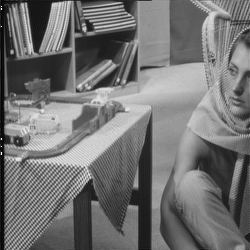

In [19]:
barb_ds_wf = downsampling(barb_square, m, 'FILTER_ON')
w_ds_wf, h_ds_wf = barb_ds_wf.size
displayImage(barb_ds_wf, w_ds_wf, h_ds_wf)

Al haber aplicado el filtro previo al downsampling, se redujo efectivamente el contenido espectral de la imagen a decimar. De esta forma, los detalles que antes se percibían con alias directamente no están presentes (observar la apariencia lisa del pantalón). El filtro "hizo lugar" para que el acercamiento de las imágenes del espectro no genere el efecto de alias.

***
### Upsampling

El upsampling consiste en agregar ceros entre las muestras originales hasta alcanzar un tamaño $m$ veces mayor. Luego, utiliza el filtro explicado previamente a modo de interpolador para estimar el valor de las nuevas muestras.

Aplicando upsampling a la imagen downsampled sin filtro

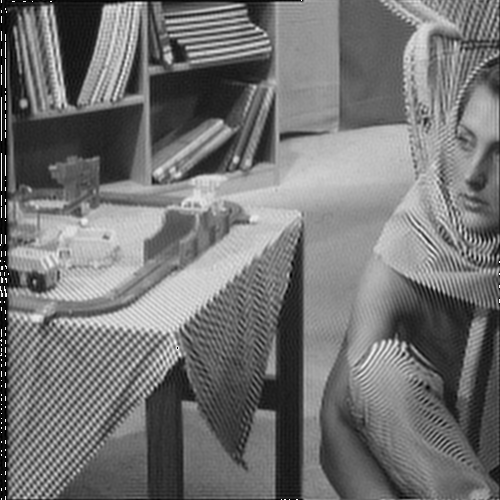

In [20]:
barb_us = upsampling(barb_ds_nf, 2)
w_us, h_us = barb_us.size
displayImage(barb_us, w_us, h_us)

Aplicando upsampling a la imagen downsampled con filtro

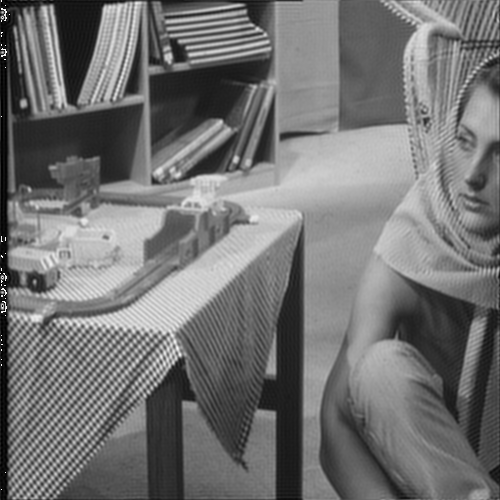

In [21]:
barb_us = upsampling(barb_ds_wf, 2)
w_us, h_us = barb_us.size
displayImage(barb_us, w_us, h_us)

En ambos casos se ve que se pudo ampliar la imagen utilizando la técnica de upsampling, con algunos artefactos en el lado izquierdo, probablemente debidos a la interpolación realizada sobre un borde negro.

Evidentemente no se recuperan los detalles de alta frecuencia perdidos durante el proceso de downsampling, dado que esa información no es recuperable una vez que ocurre el aliasing o que se elimina mediante el filtrado. Lo único que se puede hacer interpolando es generar valores para las nuevas muestras basados en los datos disponibles.